# #0 Table of Content
1. Import packages and data
2. Understanding user rating
3. 

# #1 Import packages, data and creating functions

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from similarity.normalized_levenshtein import NormalizedLevenshtein

from sklearn.cluster import KMeans

import time

In [3]:
merchant_table = pd.read_csv("../asset/etlMerchant.csv")
product_table  = pd.read_csv("../asset/etlProduct.csv")
user_table     = pd.read_csv("../asset/etlUser.csv")
review_table   = pd.read_csv("../asset/etlReview.csv")

# #2 Calculate Levenshtein Distance

In [21]:
xanon_review = review_table[~review_table['username'].str.contains('\*')].reset_index(drop=True)
xanon_review = xanon_review[['product_id','username']]
xanon_review

,product_id,username
0,912d838b-5e84-4aef-a0dd-bb23f44e5913,jessylim70
1,912d838b-5e84-4aef-a0dd-bb23f44e5913,yuejun1
2,912d838b-5e84-4aef-a0dd-bb23f44e5913,his_devil
3,912d838b-5e84-4aef-a0dd-bb23f44e5913,l1me1ee
4,912d838b-5e84-4aef-a0dd-bb23f44e5913,pym4545
...,...,...
108695,e634b9ba-08e3-4d00-997b-ee4a3437b448,nnumbs
108696,e634b9ba-08e3-4d00-997b-ee4a3437b448,yld7zt3fab
108697,8d69cbbc-7c81-41fd-8414-fc22895f3f6b,elischan93
108698,8d69cbbc-7c81-41fd-8414-fc22895f3f6b,yxfxrblqz5


In [64]:
t_start_time = time.time()
NL = NormalizedLevenshtein()

min_lev_data    = []
product_counter = 0

print(len(set(xanon_review['product_id'])))

for product_id in set(xanon_review['product_id']):
    start_time       = time.time()
    product_counter += 1
    username_list    = list(set(xanon_review[xanon_review['product_id'] == product_id]['username']))
    
    print(f"Product #{product_counter} | There's {len(username_list)} users here.", end=' ')
    
    if len(username_list) < 2:
        print('')
        continue
    
    for username in username_list:
        distances = [(other_username, NL.distance(username, other_username)) for other_username in username_list if other_username != username]

        min_dist_username, min_dist = min(distances, key= lambda x: x[1])

        min_lev_data.append((product_id, username, min_dist_username, min_dist))

    end_time = time.time()
    execution_time = end_time - start_time
    print(f"It took {execution_time:.2f} seconds to calculate lev dist for all.")
    
    min_lev_table = pd.DataFrame(min_lev_data, columns=['product_id', 'username', 'min_dist_username', 'min_dist'])

t_end_time = time.time()
t_execution_time = t_end_time - t_start_time

print(f"It took a total of {t_execution_time} seconds to run this analysis")

min_lev_table = pd.DataFrame(min_lev_data, columns=['product_id', 'username', 'min_dist_username', 'min_dist'])

558
Product #1 | There's 62 users here. It took 0.28 seconds to calculate lev dist for all.
Product #2 | There's 115 users here. It took 0.82 seconds to calculate lev dist for all.
Product #3 | There's 149 users here. It took 1.21 seconds to calculate lev dist for all.
Product #4 | There's 30 users here. It took 0.05 seconds to calculate lev dist for all.
Product #5 | There's 240 users here. It took 3.50 seconds to calculate lev dist for all.
Product #6 | There's 65 users here. It took 0.22 seconds to calculate lev dist for all.
Product #7 | There's 1022 users here. It took 56.29 seconds to calculate lev dist for all.
Product #8 | There's 1 users here. 
Product #9 | There's 140 users here. It took 0.86 seconds to calculate lev dist for all.
Product #10 | There's 42 users here. It took 0.08 seconds to calculate lev dist for all.
Product #11 | There's 11 users here. It took 0.01 seconds to calculate lev dist for all.
Product #12 | There's 1040 users here. It took 64.54 seconds to calcula

In [68]:
min_lev_table.sort_values(by='min_dist').head(50)

,product_id,username,min_dist_username,min_dist
56176,bf2eb282-f554-42ba-be47-759b82f479b1,pureserene01,pureserene07,0.083333
56249,bf2eb282-f554-42ba-be47-759b82f479b1,pureserene07,pureserene01,0.083333
29854,044f9a52-a9fc-45d2-9940-376ff177a05d,liyanayacob,lianayacob,0.090909
29762,044f9a52-a9fc-45d2-9940-376ff177a05d,lianayacob,liyanayacob,0.090909
71238,8a674261-ee5d-4172-8e61-dade35fc8729,sereneyeow,sereneyew,0.100000
71660,8a674261-ee5d-4172-8e61-dade35fc8729,sereneyew,sereneyeow,0.100000
76315,95b73f4a-1e51-4e4e-94f1-ad68c55889c2,chrisgoh17,chrisgoh07,0.100000
75827,95b73f4a-1e51-4e4e-94f1-ad68c55889c2,chrisgoh07,chrisgoh17,0.100000
10276,6cee19d7-8c5b-4a2e-999f-b301c7837092,joannewcl,joannewcn,0.111111
10266,6cee19d7-8c5b-4a2e-999f-b301c7837092,joannewcn,joannewcl,0.111111


In [67]:
min_lev_table.to_csv('../asset/backupMinLev.csv', index=False)

# #3 Analysis on Levenshtein distance

In [77]:
review_new = review_table.merge(min_lev_table, on=['product_id','username'], how='right')
review_new[review_new['min_dist'] <= 0.3].rating.value_counts()

rating
5    617
4     38
3     22
2     10
1      8
Name: count, dtype: int64

In [96]:
lev_dist = 0

while lev_dist < 1:
    lev_dist += 0.01
    lev_dist = round(lev_dist, 2)
    table = review_new[review_new['min_dist'] <= lev_dist]
    print(lev_dist)
    print(f"{len(table)} users | {len(table[table['rating'] == 5])} users gave 5 star")
    print(f"{round((len(table[table['rating'] == 5]) / len(table)), 2) if len(table) != 0 else None} 5-star-ratio")
    print()

0.01
0 users | 0 users gave 5 star
None 5-star-ratio

0.02
0 users | 0 users gave 5 star
None 5-star-ratio

0.03
0 users | 0 users gave 5 star
None 5-star-ratio

0.04
0 users | 0 users gave 5 star
None 5-star-ratio

0.05
0 users | 0 users gave 5 star
None 5-star-ratio

0.06
0 users | 0 users gave 5 star
None 5-star-ratio

0.07
0 users | 0 users gave 5 star
None 5-star-ratio

0.08
0 users | 0 users gave 5 star
None 5-star-ratio

0.09
2 users | 2 users gave 5 star
1.0 5-star-ratio

0.1
8 users | 8 users gave 5 star
1.0 5-star-ratio

0.11
8 users | 8 users gave 5 star
1.0 5-star-ratio

0.12
14 users | 13 users gave 5 star
0.93 5-star-ratio

0.13
22 users | 18 users gave 5 star
0.82 5-star-ratio

0.14
24 users | 20 users gave 5 star
0.83 5-star-ratio

0.15
32 users | 28 users gave 5 star
0.88 5-star-ratio

0.16
32 users | 28 users gave 5 star
0.88 5-star-ratio

0.17
42 users | 38 users gave 5 star
0.9 5-star-ratio

0.18
42 users | 38 users gave 5 star
0.9 5-star-ratio

0.19
57 users | 52 u

In [101]:
review_new.sort_values(by='min_dist').head(50)

,review_id,username,product_id,date,rating,content,location,min_dist_username,min_dist
58608,5a1880a8-d666-4718-9feb-9a38178d18e9,pureserene01,bf2eb282-f554-42ba-be47-759b82f479b1,2022-03-12 13:49:00,5,NaN,NaN,pureserene07,0.083333
58682,60028848-3245-46a8-90cf-81739e344707,pureserene07,bf2eb282-f554-42ba-be47-759b82f479b1,2023-01-13 14:00:00,5,NaN,NaN,pureserene01,0.083333
31128,d98accf9-9b58-4cd4-bb0a-9296cda727b4,liyanayacob,044f9a52-a9fc-45d2-9940-376ff177a05d,2021-05-21 17:43:00,5,NaN,NaN,lianayacob,0.090909
31033,59ea4c22-1414-4258-92e1-468026cbbe36,lianayacob,044f9a52-a9fc-45d2-9940-376ff177a05d,2021-10-15 10:58:00,5,NaN,NaN,liyanayacob,0.090909
74649,a09c7510-fdb2-46db-a7d0-202c03642b68,sereneyew,8a674261-ee5d-4172-8e61-dade35fc8729,2023-07-15 13:52:00,5,NaN,NaN,sereneyeow,0.100000
74219,c4a168c1-e34b-4e32-9341-98ec75a0f15b,sereneyeow,8a674261-ee5d-4172-8e61-dade35fc8729,2023-03-09 12:23:00,5,NaN,NaN,sereneyew,0.100000
78946,3185c90a-afac-4fc2-bc9f-67bdea04bac2,chrisgoh07,95b73f4a-1e51-4e4e-94f1-ad68c55889c2,2022-02-20 09:21:00,5,Fast delivery. Delivered as ordered.,NaN,chrisgoh17,0.100000
79461,a6f563bb-9457-4b32-9811-c1ff8c0d92ec,chrisgoh17,95b73f4a-1e51-4e4e-94f1-ad68c55889c2,2023-01-14 11:35:00,5,NaN,NaN,chrisgoh07,0.100000
10776,febd9094-e2f8-44c7-91b3-7988209db087,joannewcn,6cee19d7-8c5b-4a2e-999f-b301c7837092,2020-05-26 11:40:00,3,cheap and worth for money,NaN,joannewcl,0.111111
10787,5b66ae89-d78a-4e63-be7f-6795ddfd6eed,joannewcl,6cee19d7-8c5b-4a2e-999f-b301c7837092,2023-03-27 15:04:00,5,NaN,NaN,joannewcn,0.111111


In [134]:
aggregate = {
    "min_dist"  : 'mean',
    "username"  : 'count'
}

rename_dict = {
    'min_dist' :"credibility_avgSim",
    'username' :"count_xanon_user"
}

product_avg_similarity = review_new.groupby('product_id').agg(aggregate).reset_index()
product_avg_similarity = product_avg_similarity.rename(columns=rename_dict)
product_avg_similarity['credibility_avgSim'] = product_avg_similarity['credibility_avgSim'].round(2)
product_avg_similarity['avg_similarity_score'] = 1 - product_avg_similarity['credibility_avgSim']

product_avg_similarity

,product_id,credibility_avgSim,count_xanon_user,avg_similarity_score
0,00ca38b7-8d71-4a14-8ff3-2e3502c740d3,0.70,49,0.30
1,013ebc59-8967-493f-a620-c840559f366a,0.56,907,0.44
2,0159ab5f-9ea3-4b64-9d21-ac0f323782a5,0.63,140,0.37
3,01b30890-2332-4c22-8a8b-9ee7e0ac4b16,0.77,12,0.23
4,0233d7c9-8596-4e9e-9a7e-0dd09025a0dd,0.70,5,0.30
...,...,...,...,...
525,fd990a19-2a9c-4140-9ac1-79df63384b68,0.59,249,0.41
526,fdcfed58-7221-4308-b4f3-1ea69d467301,0.69,32,0.31
527,fe0e0859-15fd-4a47-a04d-9c9bd47f44d1,0.75,19,0.25
528,ff5107ac-cf8f-4785-ba92-74e2788e5640,0.92,4,0.08


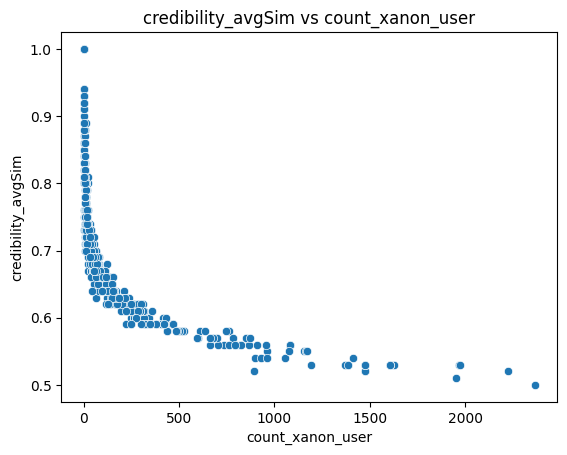

In [135]:
sns.scatterplot(data=product_avg_similarity, x='count_xanon_user', y='credibility_avgSim')
plt.title("credibility_avgSim vs count_xanon_user")
plt.show()

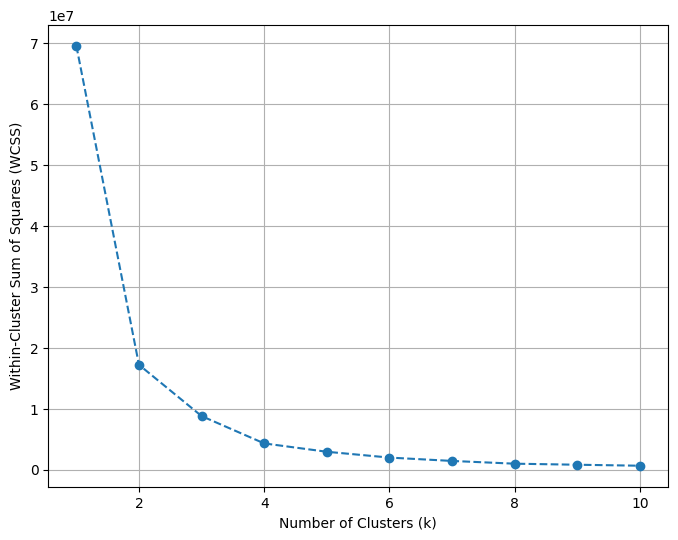

In [136]:
data = product_avg_similarity[['credibility_avgSim','count_xanon_user']]

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

In [137]:
K = 4

model_1 = KMeans(n_clusters=K, n_init=10, random_state=42)
model_1.fit(data)

product_avg_similarity['tag'] = model_1.predict(product_avg_similarity[['credibility_avgSim','count_xanon_user']])
product_avg_similarity

,product_id,credibility_avgSim,count_xanon_user,avg_similarity_score,tag
0,00ca38b7-8d71-4a14-8ff3-2e3502c740d3,0.70,49,0.30,3
1,013ebc59-8967-493f-a620-c840559f366a,0.56,907,0.44,2
2,0159ab5f-9ea3-4b64-9d21-ac0f323782a5,0.63,140,0.37,3
3,01b30890-2332-4c22-8a8b-9ee7e0ac4b16,0.77,12,0.23,3
4,0233d7c9-8596-4e9e-9a7e-0dd09025a0dd,0.70,5,0.30,3
...,...,...,...,...,...
525,fd990a19-2a9c-4140-9ac1-79df63384b68,0.59,249,0.41,0
526,fdcfed58-7221-4308-b4f3-1ea69d467301,0.69,32,0.31,3
527,fe0e0859-15fd-4a47-a04d-9c9bd47f44d1,0.75,19,0.25,3
528,ff5107ac-cf8f-4785-ba92-74e2788e5640,0.92,4,0.08,3


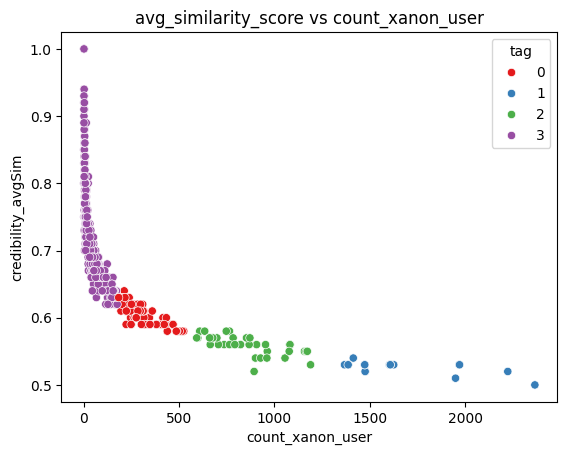

In [139]:
sns.scatterplot(data=product_avg_similarity, x='count_xanon_user', y='credibility_avgSim', hue='tag', palette="Set1")
plt.title("avg_similarity_score vs count_xanon_user")
plt.show()

# #4 Export data

In [140]:
output_table = product_avg_similarity[['product_id','credibility_avgSim','count_xanon_user']]
output_table

,product_id,credibility_avgSim,count_xanon_user
0,00ca38b7-8d71-4a14-8ff3-2e3502c740d3,0.70,49
1,013ebc59-8967-493f-a620-c840559f366a,0.56,907
2,0159ab5f-9ea3-4b64-9d21-ac0f323782a5,0.63,140
3,01b30890-2332-4c22-8a8b-9ee7e0ac4b16,0.77,12
4,0233d7c9-8596-4e9e-9a7e-0dd09025a0dd,0.70,5
...,...,...,...
525,fd990a19-2a9c-4140-9ac1-79df63384b68,0.59,249
526,fdcfed58-7221-4308-b4f3-1ea69d467301,0.69,32
527,fe0e0859-15fd-4a47-a04d-9c9bd47f44d1,0.75,19
528,ff5107ac-cf8f-4785-ba92-74e2788e5640,0.92,4


In [141]:
addProduct = pd.read_csv("../asset/addProduct.csv")
addProduct

,product_id,tag,avg_norm_rating,count_norm_rating
0,912d838b-5e84-4aef-a0dd-bb23f44e5913,beginner_L1_merchant,0.00,197
1,34bb8bfe-e134-41af-a487-3b8d4ce6fff0,beginner_L4_merchant,0.02,40
2,35ff0f3c-8a06-4e33-a789-319ff793220d,beginner_L1_merchant,-0.07,14
3,33cfcddf-a606-4d60-8d78-5926aee333ac,beginner_L1_merchant,-0.12,14
4,58b2475a-2ba2-4404-b9b5-35a633c76462,beginner_L2_merchant,0.02,352
...,...,...,...,...
587,6614655f-4e19-4a09-bf0c-9e147817aebf,beginner_L1_merchant,0.00,9
588,1230caa9-a28e-4178-9dbc-d0d9f39b928e,beginner_L1_merchant,0.00,0
589,8b1afcc4-2522-48fb-8e1a-0a186525d692,intermediate_merchant,0.00,0
590,e634b9ba-08e3-4d00-997b-ee4a3437b448,beginner_L2_merchant,-0.03,8


In [142]:
output_table = output_table.merge(addProduct, on='product_id', how='right')
output_table

,product_id,credibility_avgSim,count_xanon_user,tag,avg_norm_rating,count_norm_rating
0,912d838b-5e84-4aef-a0dd-bb23f44e5913,0.53,1190.0,beginner_L1_merchant,0.00,197
1,34bb8bfe-e134-41af-a487-3b8d4ce6fff0,0.62,209.0,beginner_L4_merchant,0.02,40
2,35ff0f3c-8a06-4e33-a789-319ff793220d,0.68,63.0,beginner_L1_merchant,-0.07,14
3,33cfcddf-a606-4d60-8d78-5926aee333ac,0.70,63.0,beginner_L1_merchant,-0.12,14
4,58b2475a-2ba2-4404-b9b5-35a633c76462,0.55,1158.0,beginner_L2_merchant,0.02,352
...,...,...,...,...,...,...
587,6614655f-4e19-4a09-bf0c-9e147817aebf,0.71,33.0,beginner_L1_merchant,0.00,9
588,1230caa9-a28e-4178-9dbc-d0d9f39b928e,NaN,NaN,beginner_L1_merchant,0.00,0
589,8b1afcc4-2522-48fb-8e1a-0a186525d692,0.91,4.0,intermediate_merchant,0.00,0
590,e634b9ba-08e3-4d00-997b-ee4a3437b448,0.72,52.0,beginner_L2_merchant,-0.03,8


In [143]:
output_table['credibility_avgSim'] = output_table['credibility_avgSim'].fillna(1)
output_table['count_xanon_user']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          592 non-null    object 
 1   credibility_avgSim  530 non-null    float64
 2   count_xanon_user    530 non-null    float64
 3   tag                 592 non-null    object 
 4   avg_norm_rating     592 non-null    float64
 5   count_norm_rating   592 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 27.9+ KB
